# Lexical Analysis of XPN's AtoZ Playlist

One of the cool things about WXPN is their _special programming_
which is always interesting.
This year, they put togeher a multiday alpahbetical playlist
called [XPN's A to Z](http://xpn.org/music-artist/xpn-a-z).



## Load the data

The page above contains a directory by first letter.
Behind the scenes, it makes ReST request to their backend.
Eventualy we should cache the reusults,
so this keeps working when they change the site.
But right now while the playlist is still going,
just build a data frame off of the results.

In [1]:
%matplotlib inline
from lxml import html
import requests
import pandas as pd
from IPython.display import display, HTML

rows = []
for letter in ['A', 'B']:
    page = requests.get('http://origin.xpn.org/static/az.php?q=%s' %  letter)
    tree = html.fromstring(page.content)
    plays = tree.xpath('//li/text()')
    for play in plays:
        rows.append(play.split(' - ', 1))
playlist = pd.DataFrame(rows, columns=('Title', 'Artist'))

Basic stats on the resulting DataFrame

In [2]:
HTML(playlist.describe().to_html())

,Title,Artist
count,579,579
unique,526,369
top,Ball Of Confusion,The Beatles
freq,4,17


And the first 10 rows, just to get a feel.

In [3]:
HTML(playlist.head(10).to_html())

,Title,Artist
0,ABC,Jackson 5
1,A Big Hunk O' Love,Elvis Presley
2,A Boy Named Sue (live),Johnny Cash
3,A Case Of You,Joni Mitchell
4,A Certain Girl,Ernie K-Doe
5,A Certain Girl,Warren Zevon
6,A Change,Sheryl Crow
7,A Change Is Gonna Come,Sam Cooke
8,A Day In The Life,The Beatles
9,A Day In The Life,The Beatles


## Data Analysis
### Most frequent artists

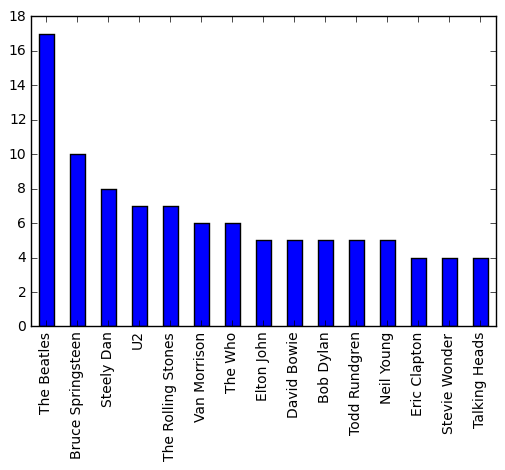

In [4]:
playlist['Artist'].value_counts().head(15).plot(kind='bar')


### Most frequent first words

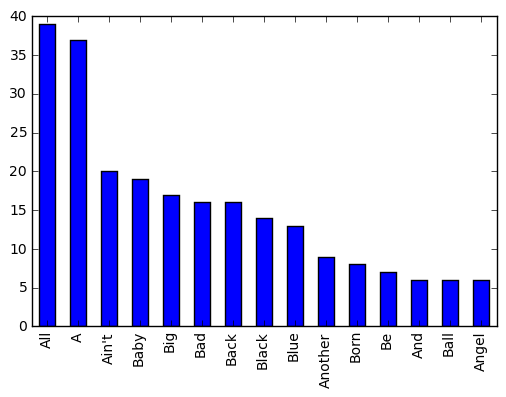

In [5]:
playlist.apply(lambda x: x[0].split()[0], axis=1).value_counts().head(15).plot(kind='bar')